# HK Housing Analysis

## Introduction

Hong Kong is home to one of the most expensive housing markets in the world. This Jupyter Notebook will be charting and interpreting the data provided by the Hong Kong Government.

Since this analysis is being done in the year 2020, economic data is also available to analyze for the months where the Hong Kong economy was influenced by COVID-19 (which covers most of 2020).

## Data Sources
- [Hong Kong Monetary Authority (HKMA)](https://www.hkma.gov.hk/)
- [Ratings and Valuation Department (RVD)](https://www.rvd.gov.hk/)
- [Census and Statistics Department (Censtatd)](https://www.censtatd.gov.hk/home.html)

In [2]:
# Prerequisites
import pandas as panda
import pymysql
import matplotlib.pyplot as plot

# Create database connection
host = "localhost";
database = "hkhousinganalysis";
username = "root";
password = "";

connection = pymysql.connect(host=host, user=username, password=password, db=database)

cursor = connection.cursor()

## Consumer Price Index Performance

Below charts the CPI performance in Hong Kong. Also known as "Consumer Price Index", is essentially to measure purchase power. Despite not being exactly part of housing, CPI is still important to determine the purchasing power and economics of renters and buyers in the housing market.

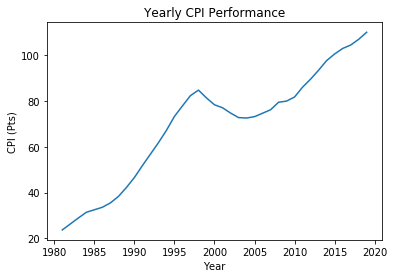

In [3]:
# CPI Data

cpiDataQuery = cursor.execute("SELECT `year`, `cpi` FROM `censtats_cpi_data`;")

cpiDataQuery = cursor.fetchall()

cpiDF = panda.DataFrame(cpiDataQuery)

yearToNum = []

cpiToNum = []

for row in cpiDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        cpiToNum.append(float(row[1]))
        
plot.plot(yearToNum, cpiToNum)
plot.title("Yearly CPI Performance")
plot.xlabel("Year")
plot.ylabel("CPI (Pts)")
plot.show()


As seen in the chart above, the CPI for Hong Kong residents has increased over the years from the start of the data set, with the uptrend expected to continue in the long-term.

## House Prices

Below charts the price averages per square meter for bought housing across Grades A to E housing properties on the market.

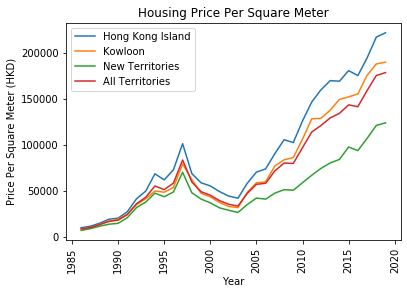

In [4]:
# Housing Price Data

# Hong Kong Island Data
priceByClassHKIDataQuery = cursor.execute("SELECT * FROM `rv_price_by_class_data_hki`;")
pricebyClassHKIDataQuery = cursor.fetchall()

priceByClassHKIDF = panda.DataFrame(pricebyClassHKIDataQuery)

yearToNum = []
avgPriceHKI = []

for row in priceByClassHKIDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgPriceHKI.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgPriceHKI, label="Hong Kong Island")
    
    plot.title("Housing Price Per Square Meter")
    plot.xlabel("Year")
    plot.xticks(rotation=90)
    plot.ylabel("Price Per Square Meter (HKD)")
except TypeError:
    pass

# Kowloon Data
priceByClassKOWDataQuery = cursor.execute("SELECT * FROM `rv_price_by_class_data_kow`;")
pricebyClassKOWDataQuery = cursor.fetchall()

priceByClassKOWDF = panda.DataFrame(pricebyClassKOWDataQuery)

yearToNum = []
avgPriceKOW = []

for row in priceByClassKOWDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgPriceKOW.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgPriceKOW, label="Kowloon")
except TypeError:
    pass

# New Territories Data
priceByClassNTDataQuery = cursor.execute("SELECT * FROM `rv_price_by_class_data_nt`;")
pricebyClassNTDataQuery = cursor.fetchall()

priceByClassNTDF = panda.DataFrame(pricebyClassNTDataQuery)

yearToNum = []
avgPriceNT = []

for row in priceByClassNTDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgPriceNT.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgPriceNT, label="New Territories")
except TypeError:
    pass

# All Territories

avgPriceAllTerritories = []

for index in range(len(avgPriceNT)):
    avgPriceAllTerritories.append((float(avgPriceHKI[index]) + float(avgPriceKOW[index]) + float(avgPriceNT[index]))/3)

try:
    plot.plot(yearToNum, avgPriceAllTerritories, label="All Territories")
    plot.legend()
    plot.show()
except TypeError:
    pass

The chart itself has charted lines for all 3 territories of Hong Kong, as well the average price line for all territories together. 

As seen in the chart, New Territories rent per square meter is the lowest out of the 3 territories. This could be due to New Territories being much farther away from locations stretching across Queen's Road, making it less appealing compared to Kowloon and Hong Kong Island. 

Properties in Hong Kong Island are as expected, much more expensive as there is no need to cross Victoria Harbour to reach offices in Central, Causeway Bay, and so on.

Kowloon, despite being densely populated and retaining Hong Kong's old and classic architecture, it seems to fall in the middle between Hong Kong Island and New Territories properties. It is also geographically in the middle of the two territories, making it easy to get to Central.

## Rent Prices

Below charts the price averages per square meter for rentals across Grades A to E housing properties on the market:

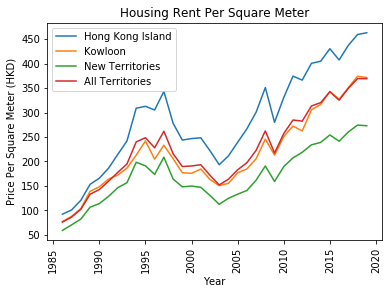

In [5]:
# Housing Rent Data

# Hong Kong Island Data
rentByClassHKIDataQuery = cursor.execute("SELECT * FROM `rv_rent_by_class_data_hki`;")
rentByClassHKIDataQuery = cursor.fetchall()

rentByClassHKIDF = panda.DataFrame(rentByClassHKIDataQuery)

yearToNum = []
avgRentHKI = []

for row in rentByClassHKIDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgRentHKI.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgRentHKI, label="Hong Kong Island")
    
    plot.title("Housing Rent Per Square Meter")
    plot.xlabel("Year")
    plot.xticks(rotation=90)
    plot.ylabel("Price Per Square Meter (HKD)")
except TypeError:
    pass

# Kowloon Data
rentByClassKOWDataQuery = cursor.execute("SELECT * FROM `rv_rent_by_class_data_kow`;")
rentbyClassKOWDataQuery = cursor.fetchall()

rentByClassKOWDF = panda.DataFrame(rentbyClassKOWDataQuery)

yearToNum = []
avgRentKOW = []

for row in rentByClassKOWDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgRentKOW.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgRentKOW, label="Kowloon")
except TypeError:
    pass

# New Territories Data
rentByClassNTDataQuery = cursor.execute("SELECT * FROM `rv_rent_by_class_data_nt`;")
rentbyClassNTDataQuery = cursor.fetchall()

rentByClassNTDF = panda.DataFrame(rentbyClassNTDataQuery)

yearToNum = []
avgRentNT = []

for row in rentByClassNTDF.iloc(0):
    yearToNum.append(int(row[0]))
    avgRentNT.append((float(row[1]) + float(row[2]) + float(row[3]) + float(row[4]) + float(row[5]))/5)

try:
    plot.plot(yearToNum, avgRentNT, label="New Territories")
except TypeError:
    pass

# All Territories

avgRentAllTerritories = []

for index in range(len(avgPriceNT)):
    avgRentAllTerritories.append((float(avgRentHKI[index]) + float(avgRentKOW[index]) + float(avgRentNT[index]))/3)

try:
    plot.plot(yearToNum, avgRentAllTerritories, label="All Territories")
    plot.legend()
    plot.show()
except TypeError:
    pass

Similar to the chart for buying, the rent chart seems to follow the same trend with Hong Kong Island being the most expensive and New Territories being the least expensive out of all territories. 

## Monthly Salaries

The values in the table below represent the monthly salaries of Hong Kong residents based on occupation.

In [6]:
# Monthly Salaries Data

monthlySalariesDataQuery = cursor.execute("SELECT * FROM `censtats_monthlypay_amount_data`;")

monthlySalariesDataQuery = cursor.fetchall()

tableRetrieveColumnNames = []

for tableColumn in cursor.description:
    tableRetrieveColumnNames.append(tableColumn[0])

unemploymentDF = panda.DataFrame(monthlySalariesDataQuery, columns=tableRetrieveColumnNames)

tableColumns = unemploymentDF.columns

filteredTableColumns = [tableColumns[0]]
tableColumns = tableColumns[12:42]

for column in tableColumns:
    filteredTableColumns.append(column)

unemploymentDF[filteredTableColumns]

year occupational_group-elementary_occupations  \
0  2011                                      8400   
1  2012                                      8600   
2  2013                                      9400   
3  2014                                     10000   
4  2015                                     10600   
5  2016                                     11100   
6  2017                                     11700   
7  2018                                     12300   
8  2019                                     12900   

  occupational_group-service_and_sales_workers  \
0                                         None   
1                                         None   
2                                        10700   
3                                        11300   
4                                        12000   
5                                        12400   
6                                        12900   
7                                        13500   
8                                        14100   

  occupational_group-craft_and_related_workers  \
0                                        13200   
1                                        14700   
2                                        15500   
3                                        16500   
4                                        18100   
5                                        19000   
6                                        20000   
7                                        21000   
8                                        21900   

  occupational_group-clerical_support_workers  \
0                                        None   
1                                        None   
2                                       11600   
3                                       12100   
4                                       13000   
5                                       13500   
6                                       14000   
7                                       14400   
8                                       15000   

  occupational_group-managers_and_administrato industry_section-manufacturing  \
0                                        21300                          12000   
1                                        22300                          12500   
2                                        23300                          13300   
3                                        24100                          14300   
4                                        25300                          14900   
5                                        26000                          15600   
6                                        26800                          16100   
7                                        27500                          16900   
8                                        28100                          17800   

  industry_section-electricity_and_gas_suppl industry_section-construction  \
0                                      22000                         15200   
1                                      23000                         16100   
2                                      23500                         17600   
3                                      24500                         18300   
4                                      25000                         20000   
5                                      25800                         21200   
6                                      26500                         22100   
7                                      27800                         22800   
8                                      28200                         23500   

  industry_section-import_and_export_trade  ...  \
0                                    14500  ...   
1                                    15000  ...   
2                                    15500  ...   
3                                    16000  ...   
4                                    16500  ...   
5                                    17100  ...   
6                             

In general, the overall salary of a Hong Kong resident has increased over the years from 2011, with education and public admin workers making the most average monthly salary across all occupations for the year 2019. It seems that monthly salary is also following the uptrend that both CPI and housing is experiencing, which shows signs of a growing economy, or inflation of the US Dollar, which the Hong Kong Dollar is pegged to. 

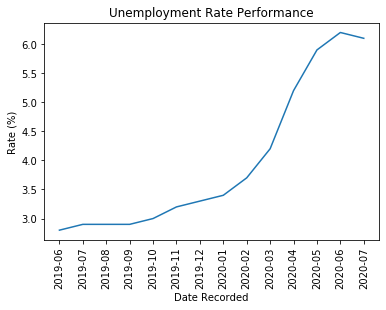

In [7]:
# Unemployment Rate Data

unemploymentDataQuery = cursor.execute("SELECT `end_of_month`, `unemploy_rate` FROM `hkma_econ_data`;")

unemploymentDataQuery = cursor.fetchall()

unemploymentDF = panda.DataFrame(unemploymentDataQuery)


endOfMonthToNum = []

unemploymentRateToNum = []

for row in unemploymentDF.iloc(0):
    if str(row[0])[5:7] != "00":
        endOfMonthToNum.append(str(row[0]))
        unemploymentRateToNum.append(panda.to_numeric(row[1]))
        
try:
    plot.plot(endOfMonthToNum, unemploymentRateToNum)
    plot.title("Unemployment Rate Performance")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Rate (%)")
    
    plot.show()
except TypeError:
    pass




Despite monthly salaries growing year over year, unemployment has increased sharply due to the COVID-19 pandemic, affecting Hong Kong's tourism business and financial hub in Asia. Despite increasing from 3.5% to over 6.0% over the course of the pandemic, Hong Kong seems to be on the road of a slow recovery as unemployment has dropped slightly between June and July of 2020.

## Hang Seng Index vs Housing Indices

The Hang Seng Index is an index comprised of some of the largest companies in Hong Kong, which makes it very good to guage how well the Hong Kong economy is doing. 

Other than HSI, the housing indices for price and rent are also charted below.

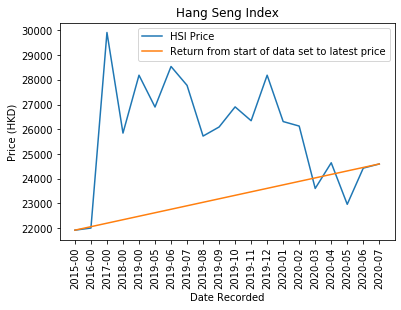

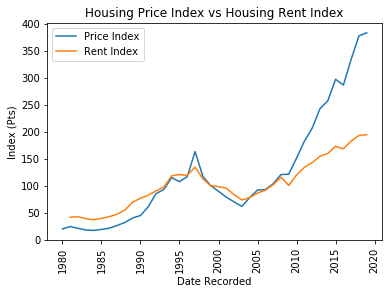

In [8]:
# HSI Data
hsiDataQuery = cursor.execute("SELECT `end_of_month`, `eq_mkt_hs_index` FROM `hkma_capitalmarkets_data`;")

hsiDataQuery = cursor.fetchall()

hsiDataDF = panda.DataFrame(hsiDataQuery)

endOfMonthToNum = []

hsiPriceToNum = []

for row in hsiDataDF.iloc(0):
    endOfMonthToNum.append(str(row[0]))
    hsiPriceToNum.append(panda.to_numeric(row[1]))
        
try:
    plot.plot(endOfMonthToNum, hsiPriceToNum, label="HSI Price")
    plot.plot([endOfMonthToNum[0], endOfMonthToNum[len(endOfMonthToNum)-1]], [hsiPriceToNum[0], hsiPriceToNum[len(hsiPriceToNum)-1]], label="Return from start of data set to latest price")
    plot.title("Hang Seng Index")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Price (HKD)")
    plot.legend()
    plot.show()
except TypeError:
    pass
    
# Housing Price Index Data
housingPriceIndexDataQuery = cursor.execute("SELECT `year`, `All_Classes` FROM `rv_price_index_by_class_data`;")

housingPriceIndexDataQuery = cursor.fetchall()

housingPriceIndexDF = panda.DataFrame(housingPriceIndexDataQuery)

yearToNum = []

housingPriceToNum = []
for row in housingPriceIndexDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        housingPriceToNum.append(float(row[1]))
        
try:
    plot.plot(yearToNum, housingPriceToNum, label="Price Index")
    plot.title("Housing Price Index vs Housing Rent Index")
    plot.xlabel("Date Recorded")
    plot.xticks(rotation=90)
    plot.ylabel("Index (Pts)")

except TypeError:
    pass

# Housing Rent Index Data
housingRentIndexDataQuery = cursor.execute("SELECT `year`, `All_Classes` FROM `rv_rent_index_by_class_data`;")

housingRentIndexDataQuery = cursor.fetchall()

housingRentIndexDF = panda.DataFrame(housingRentIndexDataQuery)

yearToNum = []

housingRentToNum = []

for row in housingRentIndexDF.iloc(0):
    if str(row[1]) != "":
        yearToNum.append(int(row[0]))
        housingRentToNum.append(float(row[1]))

try:
    plot.plot(yearToNum, housingRentToNum, label="Rent Index")
    plot.legend()
    plot.show()
except TypeError:
    pass


Both historical data sets for Hang Seng and housing indices show that the overall trend is upwards. Do note that the time series is spanned from 2015 to 2020 comapred to the housing indices that span from 1980 to 2020, however the HSI has been trending upward for the data set, and as shown in the chart above for housing indices, between 2015 and 2020, both price and rent indices trend up as well. 

## Conclusion

With a global COVID-19 pandemic, many Hong Kong businesses have shut down permanently, especially restaurants and luxury clothing stores. This proved costly to the economy as the Hang Seng Index has dropped from well over 28000 HKD at the end of 2019 to 23000 HKD in May 2020.

However, Hong Kong house prices continue to increase over the years, matching the year-over-year increase in CPI, prices per square meter, and the overall HK economy. All charts show that the latest data points have shown a slow down in the uptrend, which should recover within the next few years once Hong Kong's tourism levels return to normal to stimulate the local economy. 
